## 1. Introduction


## 2. Data Set
### 2.1	Hotel Reservation Data set


## 3. Data Recognition
As the first step, we need to import the main libraries to start analysis.


In [1]:
#| label: import-libraries
# importing main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import warnings
from sklearn.feature_selection import VarianceThreshold
warnings.filterwarnings("ignore")

## 3.1 Loading Data
To use data, we need to import them and read the data. In this case, our data is CSV files, and it is in the folder whose name is data.

In [2]:
#| label: data-import
dfHotel = pd.read_csv('data\HotelReservations.csv')
dfHotel.head() 

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
#| label: data-import3
dfCVD = pd.read_csv('data\CVD_cleaned.csv')
dfCVD.head() 

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
#| label: data-import2
dfweatherAUS = pd.read_csv('data\weatherAUS.csv')
dfweatherAUS.head() 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
#| label: show how many rows and coloumn in data set1
dfHotel.shape

(36275, 19)

In [6]:
#| label: show how many rows and coloumn in data set2
dfCVD.shape

(308854, 19)

In [7]:
#| label: show how many rows and coloumn in data set3
dfweatherAUS.shape

(145460, 23)

With this function, we check all culmns and their type. 

In [8]:
#| label: Get informaion
# getting data on dataset
dfHotel.info()
dfCVD.info()
dfweatherAUS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

## 4. Data Pre-processing
This process is beneficial for several reasons. Reducing dimensionality, improving computational efficiency and enhancing model performance.
In the pre-processing step, dimension reduction, outlier detection and missing value handling were conducted.

### 4.1. Dropping unnecessary columns and rows:
Dropping unnecessary columns and rows is a data preprocessing step that involves removing specific columns or rows from a dataset that are deemed unnecessary for the analysis or modeling task at hand. 
 We selected the best columns using the feature selection algorithm and we will obtain the accuracy of the model before and after that.


#### 4.2. Checking missing values
In most cases, we do not get complete datasets. They either have some missing values in the rows and columns. However, fortunately, we check whether the dataset has any missing values or not, and as you can see in the output of the block below, there is no missing value in this dataset


In [9]:
# Drop rows with null values

dfHotel =dfHotel.dropna()
dfCVD =dfCVD.dropna()
dfweatherAUS =dfweatherAUS.dropna()
dfHotel.info()
dfCVD.info()
dfweatherAUS.info()

dataframes = [dfweatherAUS, dfCVD, dfHotel]

for i, df in enumerate(dataframes, start=1):
    shape = df.shape
    print(f"Shape of df{i}: {shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [10]:
# Checking for missing values in the entire dataset
dataframes = [dfweatherAUS, dfCVD, dfHotel]

for i, df in enumerate(dataframes, start=1):
    missing_values = df.isnull().sum()
    print(f"Missing values in df{i}:")
    print(missing_values)

Missing values in df1:
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64
Missing values in df2:
General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History             

#### 	4.3 Checking for garbage values
Garbage value is generally a term meaning that the value in a variable which means nothing.
By checking the statistical information of the data, some variables have negative values, and some have 0 values which are not compatible with the definition (corresponding to the dataset).
The detail of these values is given in the following tables:
 *** Negative Values and Ziro for deleting ***
 Using this code, we check the data for minus and zero values if they are not compatible by the meaning they have.

In [11]:
# get name the columns
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [12]:
# Checking the negative values of no_of_adults
dataframes = [dfweatherAUS, dfCVD, dfHotel]

for i, df in enumerate(dataframes, start=1):
    print(f"DataFrame {i}:")
    for column in df.columns:
        print(f"Value counts for column '{column}':")
        print(df[column].value_counts())

DataFrame 1:
Value counts for column 'Date':
Date
2010-11-16    25
2009-03-09    25
2009-03-28    25
2009-03-26    25
2010-05-17    25
              ..
2008-03-26     1
2008-03-25     1
2008-03-24     1
2008-03-23     1
2008-01-02     1
Name: count, Length: 3416, dtype: int64
Value counts for column 'Location':
Location
Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: count, dtype: int64
Va

As shown above, there are no undefined values in each variables. Therefore, we omit no cases.

### 4.4 Checking the distribution of each variable 
Checking the distribution of each variable involves examining the spread and pattern of values within individual columns or features in the dataset. Understanding the distribution helps you gain insights into the central tendencies, variability, and shape of the data. This is crucial for making informed decisions during data analysis and modeling. Common statistical measures used to describe the distribution include mean, median, and standard deviation.
.


In [13]:
# check the distribution for each column
dataframes = {'dfweatherAUS': dfweatherAUS, 'dfCVD': dfCVD, 'dfHotel': dfHotel}

for name, df in dataframes.items():
    print(f"DataFrame {name}:")
    print(df.describe().T)

DataFrame dfweatherAUS:
                 count         mean        std    min     25%     50%     75%  \
MinTemp        56420.0    13.464770   6.416689   -6.7     8.6    13.2    18.4   
MaxTemp        56420.0    24.219206   6.970676    4.1    18.7    23.9    29.7   
Rainfall       56420.0     2.130397   7.014822    0.0     0.0     0.0     0.6   
Evaporation    56420.0     5.503135   3.696282    0.0     2.8     5.0     7.4   
Sunshine       56420.0     7.735626   3.758153    0.0     5.0     8.6    10.7   
WindGustSpeed  56420.0    40.877366  13.335232    9.0    31.0    39.0    48.0   
WindSpeed9am   56420.0    15.667228   8.317005    2.0     9.0    15.0    20.0   
WindSpeed3pm   56420.0    19.786778   8.510180    2.0    13.0    19.0    26.0   
Humidity9am    56420.0    65.874123  18.513289    0.0    55.0    67.0    79.0   
Humidity3pm    56420.0    49.601985  20.197040    0.0    35.0    50.0    63.0   
Pressure9am    56420.0  1017.239505   6.909357  980.5  1012.7  1017.2  1021.8   
Pres

Using this code, the most important statistical information of each numeric predictiors are calculated.

In [14]:
dataframes = {'dfweatherAUS': dfweatherAUS, 'dfCVD': dfCVD, 'dfHotel': dfHotel}

for name, df in dataframes.items():
    df_numeric = df.select_dtypes(include=np.number)
    print(f"Shape of numeric columns in DataFrame {name}: {df_numeric.shape}")

Shape of numeric columns in DataFrame dfweatherAUS: (56420, 16)
Shape of numeric columns in DataFrame dfCVD: (308854, 7)
Shape of numeric columns in DataFrame dfHotel: (36275, 14)


In [15]:
# finding zero variance variables
dataframes = {'dfweatherAUS': dfweatherAUS, 'dfCVD': dfCVD, 'dfHotel': dfHotel}

for name, df in dataframes.items():
    df_numeric = df.select_dtypes(include=np.number)
    selector_vr = VarianceThreshold(threshold=0)
    transformed_data = selector_vr.fit_transform(df_numeric)
    print(f"Transformed data shape for DataFrame {name}: {transformed_data.shape}")

Transformed data shape for DataFrame dfweatherAUS: (56420, 16)
Transformed data shape for DataFrame dfCVD: (308854, 7)
Transformed data shape for DataFrame dfHotel: (36275, 14)


If there are variables with standard deviation near the zero , we can delete it . 


In [16]:
dataframes = {'dfweatherAUS': dfweatherAUS, 'dfCVD': dfCVD, 'dfHotel': dfHotel}

for name, df in dataframes.items():
    print(f"DataFrame {name} - Head:")
    print(df.head())
    print(f"DataFrame {name} - Columns:")
    print(df.columns)

DataFrame dfweatherAUS - Head:
            Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6049  2009-01-01    Cobar     17.9     35.2       0.0         12.0      12.3   
6050  2009-01-02    Cobar     18.4     28.9       0.0         14.8      13.0   
6052  2009-01-04    Cobar     19.4     37.6       0.0         10.8      10.6   
6053  2009-01-05    Cobar     21.9     38.4       0.0         11.4      12.2   
6054  2009-01-06    Cobar     24.2     41.0       0.0         11.2       8.4   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
6049         SSW           48.0        ENE  ...        20.0         13.0   
6050           S           37.0        SSE  ...        30.0          8.0   
6052         NNE           46.0        NNE  ...        42.0         22.0   
6053         WNW           31.0        WNW  ...        37.0         22.0   
6054         WNW           35.0         NW  ...        19.0         15.0   

      Pressure9am  Pressure3pm 

Now, we check the categorical variables and their categories to show the frequency of each values.

Histograms are useful for analyzing the frequency distribution of different values for each variable. In each histogram, the horizontal axis represents the variable values, and the vertical axis indicates the frequency or the number of times each value appears in the data. The height of each column reflects the frequency or the number of samples with a specific value in that interval.


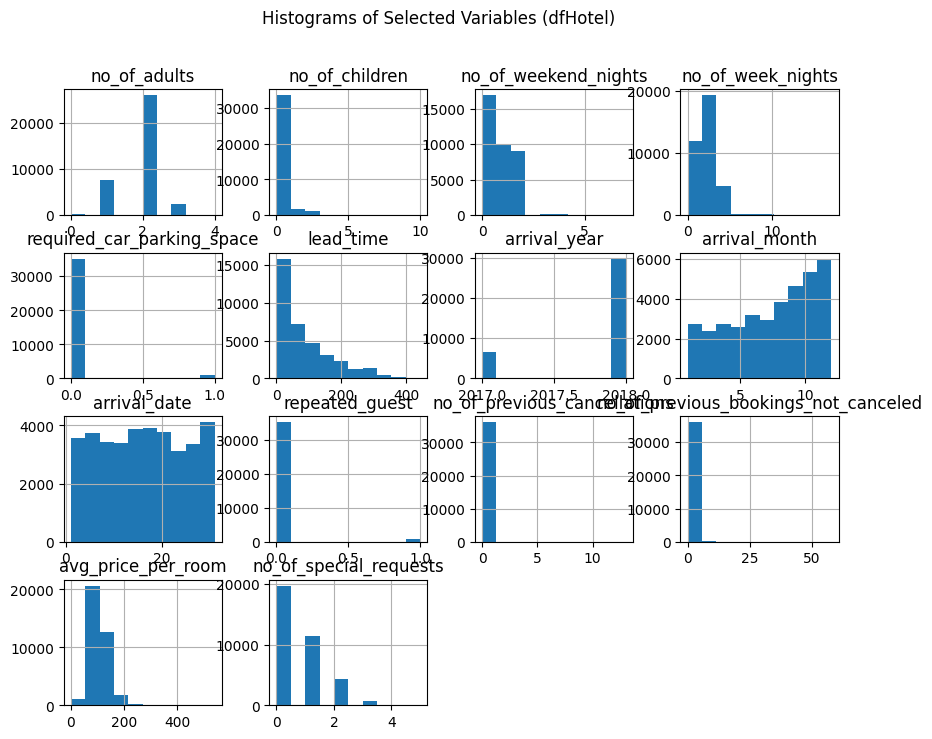

In [17]:
# Specify the columns you want to include in the analysis - dfHotel
selected_columns_dfHotel = [ 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status']

# Create a DataFrame containing only the selected columns
selected_dfHotel = dfHotel[selected_columns_dfHotel]

# Plot histograms for each variable
selected_dfHotel.hist(figsize=(10, 8))
plt.suptitle('Histograms of Selected Variables (dfHotel)')
plt.show()

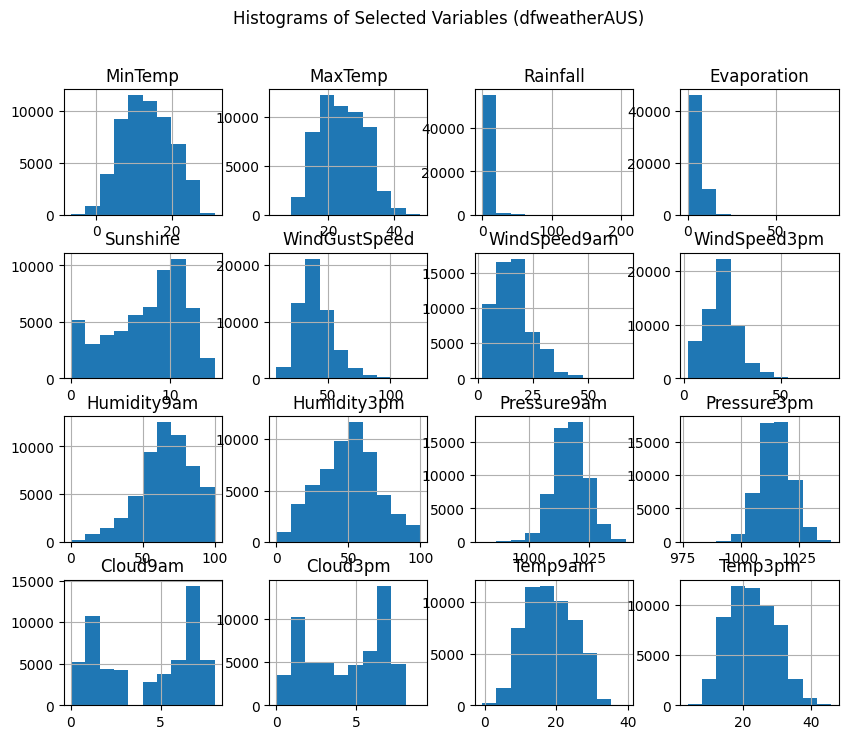

In [18]:
# Specify the columns you want to include in the analysis - dfweatherAUS
selected_columns_dfweatherAUS = [ 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow']

# Create a DataFrame containing only the selected columns
selected_dfweatherAUS = dfweatherAUS[selected_columns_dfweatherAUS]

# Plot histograms for each variable
selected_dfweatherAUS.hist(figsize=(10, 8))
plt.suptitle('Histograms of Selected Variables (dfweatherAUS)')
plt.show()

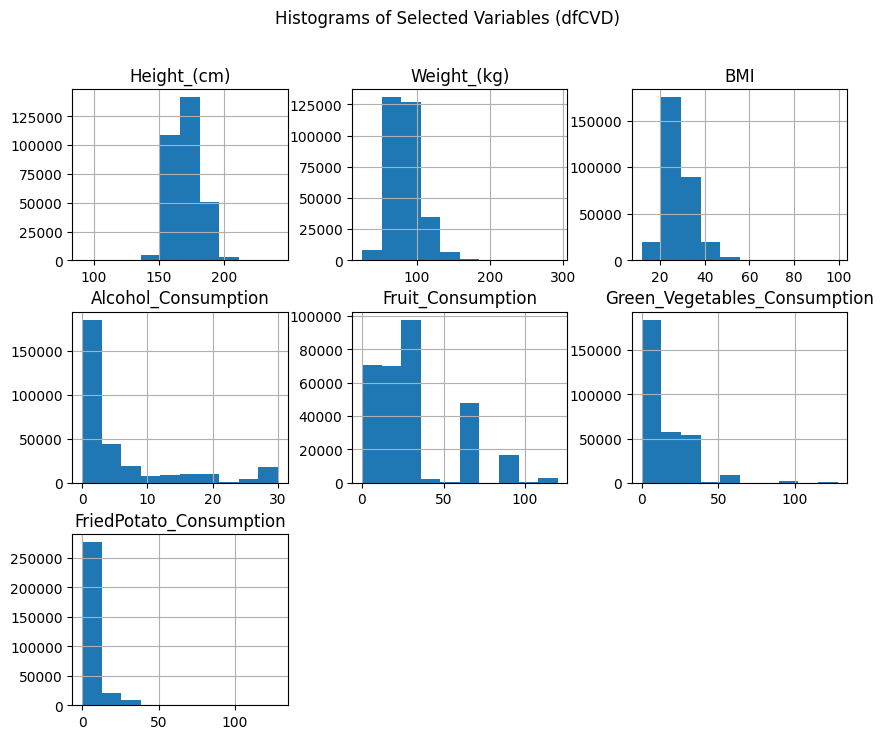

In [19]:
# Specify the columns you want to include in the analysis - dfCVD
selected_columns_dfCVD = [ 'General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Create a DataFrame containing only the selected columns
selected_dfCVD = dfCVD[selected_columns_dfCVD]

# Plot histograms for each variable
selected_dfCVD.hist(figsize=(10, 8))
plt.suptitle('Histograms of Selected Variables (dfCVD)')
plt.show()

In [20]:
# Displaying some statistics about categorical data
dataframes = {'dfweatherAUS': dfweatherAUS, 'dfCVD': dfCVD, 'dfHotel': dfHotel}

for name, df in dataframes.items():
    print(f"DataFrame {name} - Summary statistics for object-type columns:")
    print(df.describe(include='object'))

DataFrame dfweatherAUS - Summary statistics for object-type columns:
              Date Location WindGustDir WindDir9am WindDir3pm RainToday  \
count        56420    56420       56420      56420      56420     56420   
unique        3416       26          16         16         16         2   
top     2010-11-16   Darwin           E          N         SE        No   
freq            25     3062        4516       4967       4153     43958   

       RainTomorrow  
count         56420  
unique            2  
top              No  
freq          43993  
DataFrame dfCVD - Summary statistics for object-type columns:
       General_Health               Checkup Exercise Heart_Disease  \
count          308854                308854   308854        308854   
unique              5                     5        2             2   
top         Very Good  Within the past year      Yes            No   
freq           110395                239371   239381        283883   

       Skin_Cancer Other_Cancer 

### 4.5 Data Transformation

#### 4.5.1 Transforming the categorical variables
In this step, we numerized object variables . As it mentioned earlier, booking_status and target has two object:Not_Canceled
, Canceled
. For efficient use in the models, we convert Canceled
 to 1 and Not_Canceled to 0.
If we have a column that is object or if we have Boolean, we can convert them to integer. 

In [21]:
dfCVD.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [22]:
dfweatherAUS.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000


In [23]:
dfHotel.describe()
dfHotel.describe(include='object')

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


????


In [24]:
dataframes = {'dfweatherAUS': dfweatherAUS, 'dfCVD': dfCVD, 'dfHotel': dfHotel}

for name, df in dataframes.items():
    print(f"DataFrame {name}:")
    for column in df.columns:
        if df[column].dtype == 'object':
            unique_values = df[column].unique()
            print(f"Unique values for column '{column}':")
            print(unique_values)

DataFrame dfweatherAUS:
Unique values for column 'Date':
['2009-01-01' '2009-01-02' '2009-01-04' ... '2016-07-08' '2016-06-04'
 '2016-06-05']
Unique values for column 'Location':
['Cobar' 'CoffsHarbour' 'Moree' 'NorfolkIsland' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Canberra' 'Sale' 'MelbourneAirport'
 'Melbourne' 'Mildura' 'Portland' 'Watsonia' 'Brisbane' 'Cairns'
 'Townsville' 'MountGambier' 'Nuriootpa' 'Woomera' 'PerthAirport' 'Perth'
 'Hobart' 'AliceSprings' 'Darwin']
Unique values for column 'WindGustDir':
['SSW' 'S' 'NNE' 'WNW' 'N' 'SE' 'ENE' 'NE' 'E' 'SW' 'W' 'WSW' 'NNW' 'ESE'
 'SSE' 'NW']
Unique values for column 'WindDir9am':
['ENE' 'SSE' 'NNE' 'WNW' 'NW' 'N' 'S' 'SE' 'NE' 'W' 'SSW' 'E' 'NNW' 'ESE'
 'WSW' 'SW']
Unique values for column 'WindDir3pm':
['SW' 'SSE' 'NNW' 'WSW' 'WNW' 'S' 'ENE' 'N' 'SE' 'NNE' 'NW' 'E' 'ESE' 'NE'
 'SSW' 'W']
Unique values for column 'RainToday':
['No' 'Yes']
Unique values for column 'RainTomorrow':
['No' 'Yes']
DataFrame dfCVD:
Unique v

In [25]:
#using Map Function
dfHotel2 = dfHotel.copy()
columns_to_drop = ['Booking_ID','room_type_reserved']
dfHotel2= dfHotel2.drop(columns=columns_to_drop)
# Ordinal Encoding for booking_status: 1 for 'Canceled', 0 for 'Not_Canceled'
ordinal_map = {'Canceled': 1, 'Not_Canceled': 0}
dfHotel2['booking_status'] = dfHotel2['booking_status'].map(ordinal_map)
dfHotel2['booking_status'] = dfHotel2['booking_status'].astype(int)


ordinal_map = {'Meal Plan 1': 1, 'Not Selected': 0 ,'Meal Plan 2': 2,'Meal Plan 3': 3}
dfHotel2['type_of_meal_plan'] = dfHotel2['type_of_meal_plan'].map(ordinal_map)
dfHotel2['type_of_meal_plan'] = dfHotel2['type_of_meal_plan'].astype(int)

ordinal_map = {'Offline': 1, 'Online': 0 ,'Corporate': 2,'Aviation': 3,'Complementary': 4,}
dfHotel2['market_segment_type'] = dfHotel2['market_segment_type'].map(ordinal_map)
dfHotel2['market_segment_type'] = dfHotel2['market_segment_type'].astype(int)

#### 4.5.2 Normalization, standardization, scaling
The data normalization process lowers the scale and brings all the data-points on the same scale.
Normalization involves scaling the values of a variable to a specific range, usually between 0 and 1. Scaling is a general term for any transformation that alters the range of the data.
Standardization (Z-score normalization) transforms the data to have a mean of 0 and a standard deviation of 1. we use scaling in the model selection section.

## 5 Data Exploration

We put our visualization here.

### 5.1 Finding outliers , dummy variable

 Using of outlier detection methods depends on the type of data and the aim of analysis. However, generally, these methods are commonly applied to numerical and continuous variables. The reason for this is that the concept of outlier detection is more definable in continuous variables, and statistical measures such as mean, standard deviation, box plots, can easily be employed for detecting them.
For detecting outliers of discrete and categorical variables, we need to find whether types of variables are integer or objects. We find the outliers, the Q1, Q3 and compare it with data and count how much of each independent variable out of this range and then recognize them .
For each integer variable, we use boxplot and histogram for visualization. 
The plots for each variables are as follows:
Box plot is oneof best chart to show distribution of data points.
As the plot shows below, 

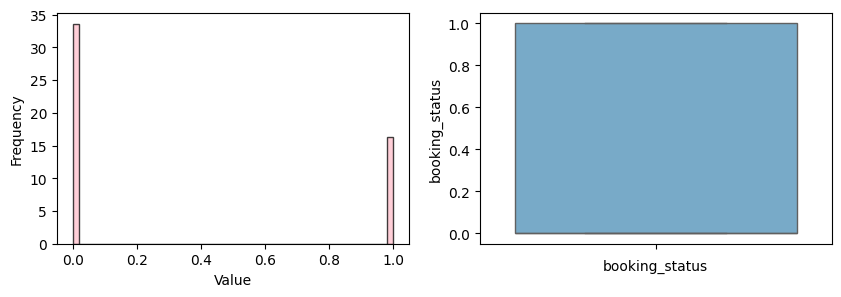

In [26]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(dfHotel2['booking_status']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='booking_status', data=dfHotel2,palette="Blues")
plt.xlabel('booking_status')
plt.show()

In [27]:
#calculate IQR and show thw outliers
Q1 = dfHotel2['booking_status'].quantile(0.25)
Q3 = dfHotel2['booking_status'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
Out1=Q1 - 1.5 * IQR
print("Out1:",Out1)
Out2=Q3 + 1.5 * IQR
print("Out2:",Out2)
outliers_booking_status = (dfHotel2['booking_status'] < Q1 - 1.5 * IQR) | (dfHotel2['booking_status'] > Q3 + 1.5 * IQR)
# Filter the DataFrame to get the actual outlier values
outliers_booking_status  = dfHotel2.loc[outliers_booking_status, 'booking_status']
# Display the outlier values
print("dfHotel2 :", outliers_booking_status)

Q1: 0.0
Q3: 1.0
IQR: 1.0
Out1: -1.5
Out2: 2.5
dfHotel2 : Series([], Name: booking_status, dtype: int32)


..............................


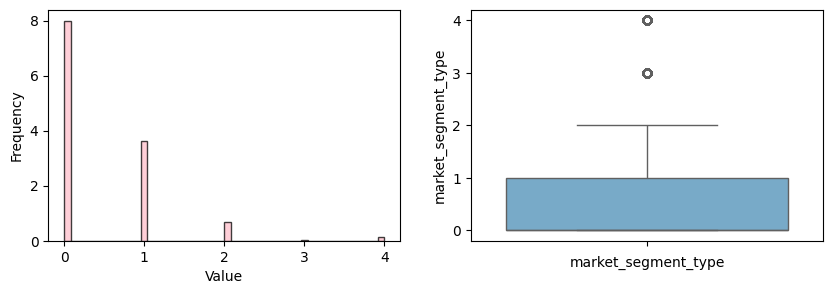

In [28]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(np.array(dfHotel2['market_segment_type']) , density=True , bins=50, edgecolor='black' ,facecolor='pink', alpha=0.75)
plt.xlabel('Value', fontsize= 10)
plt.ylabel('Frequency', fontsize= 10)
plt.subplot(122)
sns.boxplot(y ='market_segment_type', data=dfHotel2,palette="Blues")
plt.xlabel('market_segment_type')
plt.show()

In [29]:
#calculate IQR and show thw outliers
Q1 = dfHotel2['market_segment_type'].quantile(0.25)
Q3 = dfHotel2['market_segment_type'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
Out1=Q1 - 1.5 * IQR
print("Out1:",Out1)
Out2=Q3 + 1.5 * IQR
print("Out2:",Out2)
outliers_market_segment_type = (dfHotel2['market_segment_type'] < Q1 - 1.5 * IQR) | (dfHotel2['market_segment_type'] > Q3 + 1.5 * IQR)
# Filter the DataFrame to get the actual outlier values
outliers_market_segment_type  = dfHotel2.loc[outliers_market_segment_type, 'market_segment_type']
# Display the outlier values
print("dfHotel2 :", outliers_market_segment_type)

Q1: 0.0
Q3: 1.0
IQR: 1.0
Out1: -1.5
Out2: 2.5
dfHotel2 : 27       3
63       4
145      4
209      4
266      4
        ..
35469    4
35836    4
35983    4
36080    4
36165    4
Name: market_segment_type, Length: 516, dtype: int32


In [30]:
# check the columns we can see outliers
toll_dfHotel2 = dfHotel2.loc[dfHotel2['market_segment_type']>2.5]

toll_dfHotel2.shape

dfHotel2 = dfHotel2.loc[dfHotel2['market_segment_type'] <= 2.5]
dfHotel2.shape

(35759, 17)

** Bar charts for discrete and categorical variables ***

To find the outliers of  discrete and categorical variables we need to find the type of variables whether they are integer or objects . 
For each discrete variable (including Booleans), we used bar charts highlighting the booking variable for each value. 


In [31]:
int_dfHotel2 = dfHotel2.select_dtypes(include='integer')
int_dfHotel2.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'no_of_special_requests',
       'booking_status'],
      dtype='object')

In [32]:
# Checking the linear correlation of variables
int_dfHotel2=int_dfHotel2[[ 
'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'no_of_special_requests',
       'booking_status']]
corr_matrix = int_dfHotel2.corr()
corr_matrix['booking_status'].sort_values(ascending = False)

booking_status                          1.000000
lead_time                               0.436424
arrival_year                            0.178701
no_of_week_nights                       0.086688
no_of_adults                            0.082722
no_of_weekend_nights                    0.055684
type_of_meal_plan                       0.051049
no_of_children                          0.033759
arrival_date                            0.010556
arrival_month                          -0.010292
no_of_previous_cancellations           -0.030477
no_of_previous_bookings_not_canceled   -0.053903
required_car_parking_space             -0.085186
repeated_guest                         -0.099190
market_segment_type                    -0.122970
no_of_special_requests                 -0.254448
Name: booking_status, dtype: float64

<Axes: >

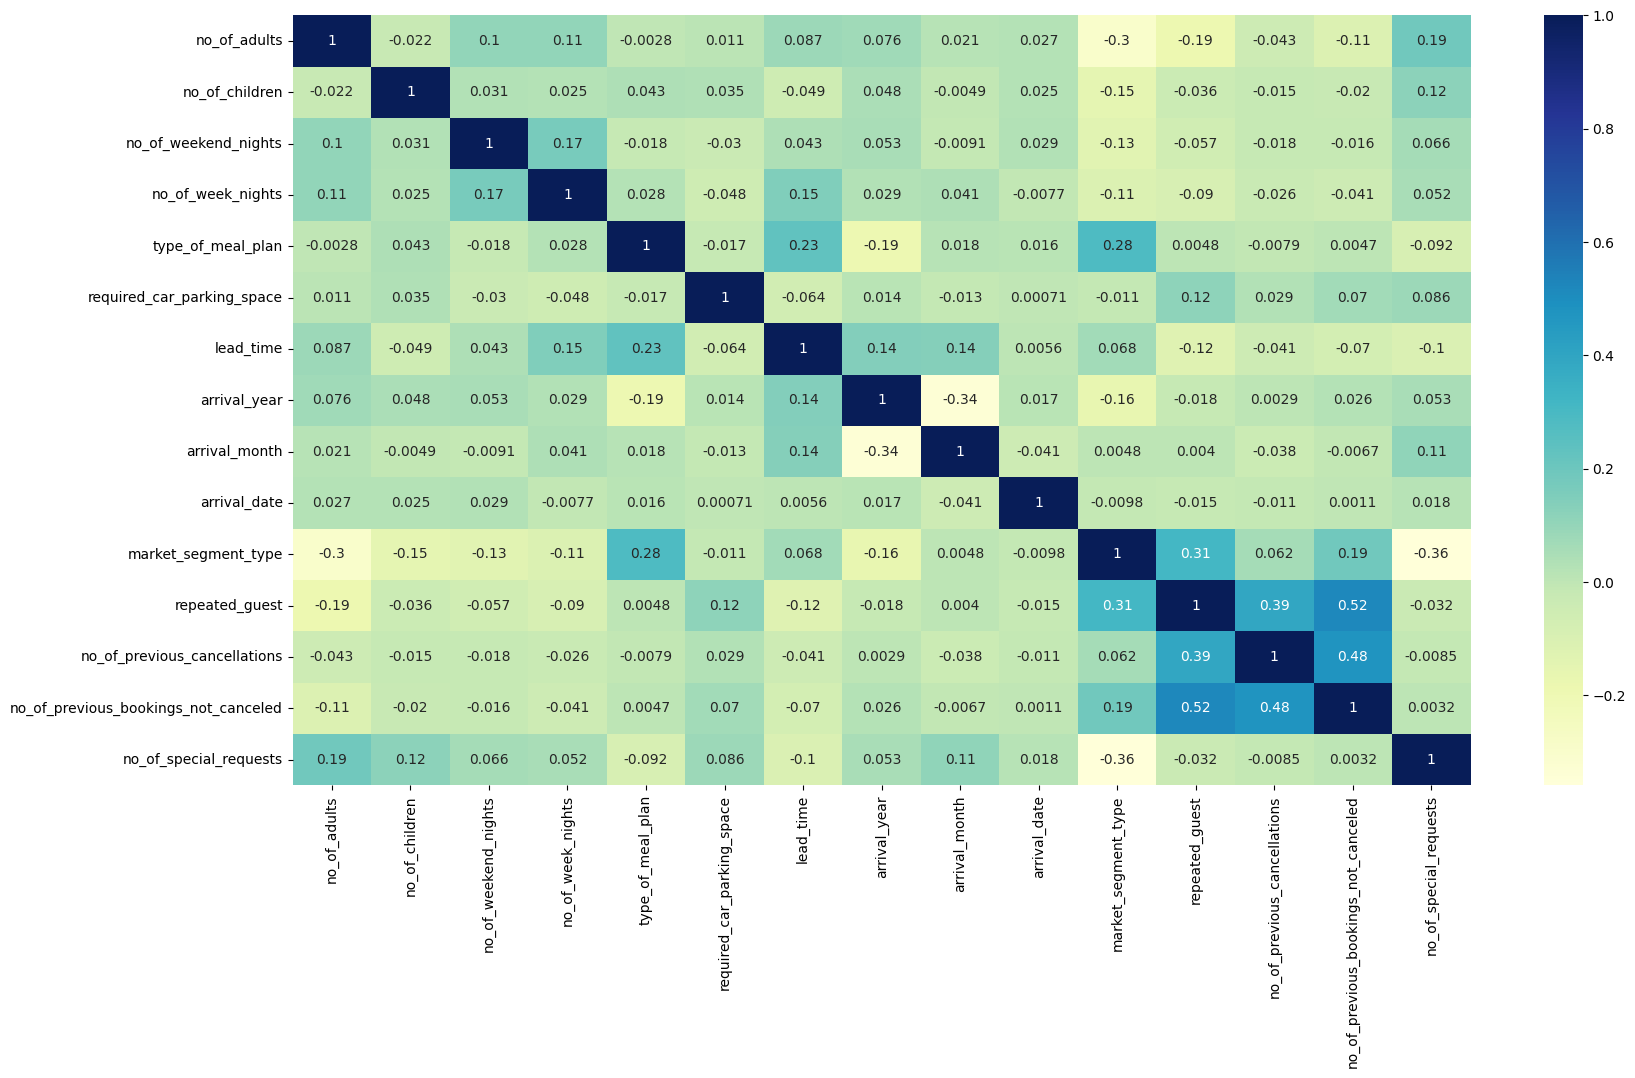

In [33]:
#| label: Get correlation visually1
plt.figure(figsize = (19,10))
sns.heatmap(int_dfHotel2[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'no_of_special_requests',
       ]].corr(), cmap="YlGnBu",
            annot=True)